In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandasql as psql

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
claims=pd.read_csv(r"E:\aiml intenship\01_AutoClaims_Train.csv",header=0)
claimstest=pd.read_csv(r"E:\aiml intenship\02_AutoClaims_Test.csv",header=0)

In [6]:
claims.head()

,Policy_Number,Policy_Type,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
0,HJ-160278596,Car,EA,CA,47,Female,Married,High School,Worker,29,Pleasure,10868,0,0,Balanced,NaN,0.0,Honda,26176.50,No
1,FO-150704678,Car,EA,OR,70,Male,Married,High School,Carpenter,49,Pleasure,17776,0,0,Basic,NaN,0.0,Ford,23340.90,No
2,BK-190076269,Van,IA,OR,39,Male,Married,PhD,Professor,21,Pleasure,17984,0,0,Balanced,NaN,0.0,Isuzu,25206.50,No
3,JR-133084982,Car,EA,AZ,29,Male,Married,Masters,Lawyer,13,Commute,15190,0,0,Balanced,NaN,0.0,Chevrolet,24685.15,No
4,ZH-196244130,Car,EA,AZ,70,Female,Married,Masters,Engineer,53,Commute,15046,0,0,Balanced,NaN,0.0,Chevrolet,28493.45,No


In [7]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27225 entries, 0 to 27224
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Policy_Number       27225 non-null  object 
 1   Policy_Type         27225 non-null  object 
 2   Channel             27225 non-null  object 
 3   State               27225 non-null  object 
 4   Age                 27225 non-null  int64  
 5   Gender              27223 non-null  object 
 6   Marital_Status      27224 non-null  object 
 7   Education           27225 non-null  object 
 8   Profession          27225 non-null  object 
 9   Driving_Exp         27225 non-null  int64  
 10  Vehicle_Usage       27225 non-null  object 
 11  Annual_Miles        27225 non-null  int64  
 12  Previous_Citations  27225 non-null  int64  
 13  Prevous_Accidents   27225 non-null  int64  
 14  Coverage_Type       27224 non-null  object 
 15  Claim_Number        3178 non-null   object 
 16  Clai

In [8]:
claims.isna().sum()


Policy_Number             0
Policy_Type               0
Channel                   0
State                     0
Age                       0
Gender                    2
Marital_Status            1
Education                 0
Profession                0
Driving_Exp               0
Vehicle_Usage             0
Annual_Miles              0
Previous_Citations        0
Prevous_Accidents         0
Coverage_Type             1
Claim_Number          24047
Claim_Paid_Out            0
Make                      4
Vehicle_Cost              0
Claimed                   0
dtype: int64

In [9]:
del claims['Claim_Number']

In [10]:
claims.head()

,Policy_Number,Policy_Type,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
0,HJ-160278596,Car,EA,CA,47,Female,Married,High School,Worker,29,Pleasure,10868,0,0,Balanced,0.0,Honda,26176.50,No
1,FO-150704678,Car,EA,OR,70,Male,Married,High School,Carpenter,49,Pleasure,17776,0,0,Basic,0.0,Ford,23340.90,No
2,BK-190076269,Van,IA,OR,39,Male,Married,PhD,Professor,21,Pleasure,17984,0,0,Balanced,0.0,Isuzu,25206.50,No
3,JR-133084982,Car,EA,AZ,29,Male,Married,Masters,Lawyer,13,Commute,15190,0,0,Balanced,0.0,Chevrolet,24685.15,No
4,ZH-196244130,Car,EA,AZ,70,Female,Married,Masters,Engineer,53,Commute,15046,0,0,Balanced,0.0,Chevrolet,28493.45,No


In [11]:
claims['Gender'] = claims['Gender'].fillna('Male')
claims['Marital_Status'] = claims['Marital_Status'].fillna('Married')
claims['Coverage_Type'] = claims['Coverage_Type'].fillna('Balanced')
claims['Make'] = claims['Make'].fillna(claims['Make'].mode()[0])

In [12]:
claims.isna().sum()

Policy_Number         0
Policy_Type           0
Channel               0
State                 0
Age                   0
Gender                0
Marital_Status        0
Education             0
Profession            0
Driving_Exp           0
Vehicle_Usage         0
Annual_Miles          0
Previous_Citations    0
Prevous_Accidents     0
Coverage_Type         0
Claim_Paid_Out        0
Make                  0
Vehicle_Cost          0
Claimed               0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in claims.columns:
    if claims[col].dtypes == 'object':
        claims[col] = le.fit_transform(claims[col])

In [14]:
claims.head()

,Policy_Number,Policy_Type,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
0,7655,0,0,1,47,0,1,1,14,29,2,10868,0,0,0,0.0,13,26176.50,0
1,5823,0,0,3,70,1,1,1,4,49,2,17776,0,0,1,0.0,11,23340.90,0
2,1476,2,1,3,39,1,1,3,11,21,2,17984,0,0,0,0.0,15,25206.50,0
3,10137,0,0,0,29,1,1,2,8,13,1,15190,0,0,0,0.0,6,24685.15,0
4,26516,0,0,0,70,0,1,2,5,53,1,15046,0,0,0,0.0,6,28493.45,0


In [15]:
claimstest.isna().sum()

Policy_Number            0
Policy_Type              0
Channel                  0
State                    0
Age                      0
Gender                   2
Marital_Status           1
Education                0
Profession               0
Driving_Exp              0
Vehicle_Usage            0
Annual_Miles             0
Previous_Citations       0
Prevous_Accidents        0
Coverage_Type            1
Claim_Number          9617
Claim_Paid_Out           0
Make                    14
Vehicle_Cost             0
Claimed                  0
dtype: int64

In [16]:
claimstest['Gender'] = claimstest['Gender'].fillna('Male')
claimstest['Marital_Status'] = claimstest['Marital_Status'].fillna('Married')
claimstest['Coverage_Type'] = claimstest['Coverage_Type'].fillna('Balanced')
claimstest['Make'] = claimstest['Make'].fillna(claimstest['Make'].mode()[0])
del claimstest['Claim_Number']
ccat=claimstest['Claimed']
del claimstest['Claimed']
ccat=ccat.str.replace('No','0')
ccat=ccat.str.replace('Yes','1')
ccat=ccat.astype(int)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in claimstest.columns:
    if claimstest[col].dtypes == 'object':
        claimstest[col] = le.fit_transform(claimstest[col])

In [18]:
x=claims.drop(['Claimed'], axis=1)
y=claims['Claimed']

In [19]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_bk = x_train.copy()
x_test_bk = x_test.copy()

In [20]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [21]:
Results=pd.read_csv(r"E:\aiml intenship\HTResults.csv",header=0)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 707  261]
 [   0 7200]]
Outcome values : 
 707 261 0 7200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.73      0.84       968
           0       0.97      1.00      0.98      7200

    accuracy                           0.97      8168
   macro avg       0.98      0.87      0.91      8168
weighted avg       0.97      0.97      0.97      8168

Accuracy : 96.8 %
Precision : 100.0 %
Recall : 73.0 %
F1 Score : 0.844
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 86.5 %
roc_auc_score: 0.865


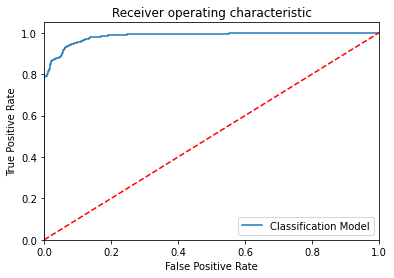

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 947   21]
 [  14 7186]]
Outcome values : 
 947 21 14 7186
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       0.99      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.6 %
Precision : 98.5 %
Recall : 97.8 %
F1 Score : 0.982
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.988


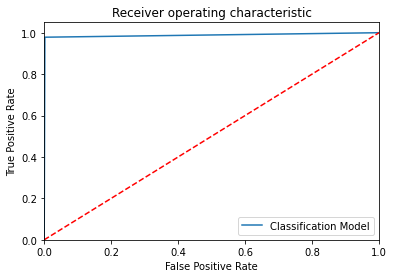

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 946   22]
 [   0 7200]]
Outcome values : 
 946 22 0 7200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       1.00      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 97.7 %
F1 Score : 0.989
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.989


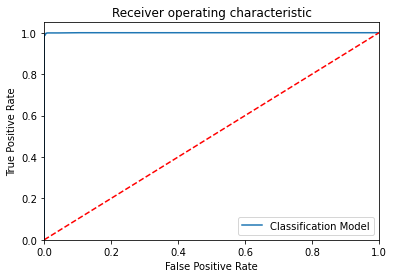

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 950   18]
 [   0 7200]]
Outcome values : 
 950 18 0 7200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       1.00      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.8 %
Precision : 100.0 %
Recall : 98.1 %
F1 Score : 0.991
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.0 %
roc_auc_score: 0.991


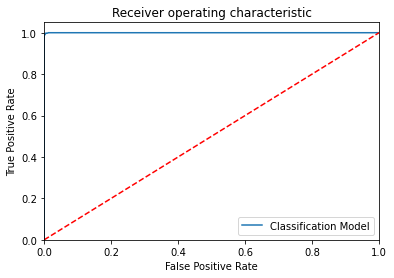

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 921   47]
 [   4 7196]]
Outcome values : 
 921 47 4 7196
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97       968
           0       0.99      1.00      1.00      7200

    accuracy                           0.99      8168
   macro avg       0.99      0.98      0.98      8168
weighted avg       0.99      0.99      0.99      8168

Accuracy : 99.4 %
Precision : 99.6 %
Recall : 95.1 %
F1 Score : 0.973
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 97.5 %
roc_auc_score: 0.975


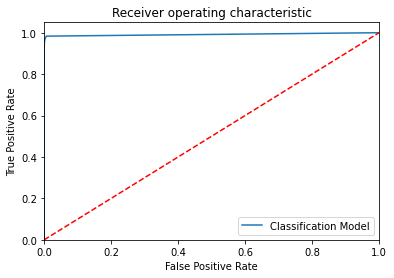

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 917   51]
 [   1 7199]]
Outcome values : 
 917 51 1 7199
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97       968
           0       0.99      1.00      1.00      7200

    accuracy                           0.99      8168
   macro avg       1.00      0.97      0.98      8168
weighted avg       0.99      0.99      0.99      8168

Accuracy : 99.4 %
Precision : 99.9 %
Recall : 94.7 %
F1 Score : 0.972
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 97.4 %
roc_auc_score: 0.974


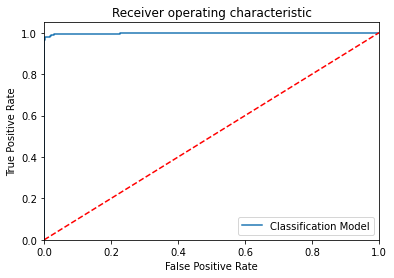

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 948   20]
 [   3 7197]]
Outcome values : 
 948 20 3 7197
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       1.00      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.7 %
Precision : 99.7 %
Recall : 97.9 %
F1 Score : 0.988
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.0 %
roc_auc_score: 0.989


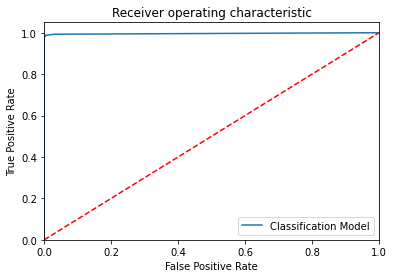

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[ 937   31]
 [   2 7198]]
Outcome values : 
 937 31 2 7198
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       1.00      0.98      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.6 %
Precision : 99.8 %
Recall : 96.8 %
F1 Score : 0.983
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.4 %
roc_auc_score: 0.984


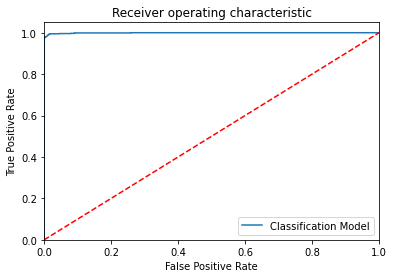

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 946   22]
 [   0 7200]]
Outcome values : 
 946 22 0 7200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       968
           0       1.00      1.00      1.00      7200

    accuracy                           1.00      8168
   macro avg       1.00      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 97.7 %
F1 Score : 0.989
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.989


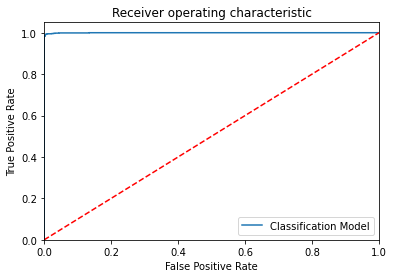

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 863  105]
 [   0 7200]]
Outcome values : 
 863 105 0 7200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.89      0.94       968
           0       0.99      1.00      0.99      7200

    accuracy                           0.99      8168
   macro avg       0.99      0.95      0.97      8168
weighted avg       0.99      0.99      0.99      8168

Accuracy : 98.7 %
Precision : 100.0 %
Recall : 89.2 %
F1 Score : 0.943
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 94.6 %
roc_auc_score: 0.946


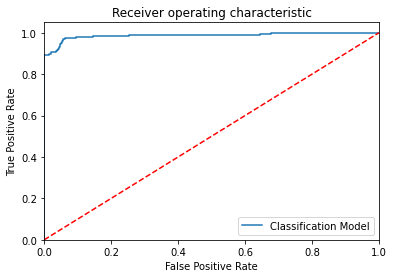

-----------------------------------------------------------------------------------------------------


In [22]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
     #Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)

In [23]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),707,261,0,7200,0.968,1.000,0.730,0.844,1.000,0.840,0.865186,0.865
1,DecisionTreeClassifier(),947,21,14,7186,0.996,0.985,0.978,0.982,0.998,0.979,0.988181,0.988
2,"(DecisionTreeClassifier(max_features='sqrt', r...",946,22,0,7200,0.997,1.000,0.977,0.989,1.000,0.987,0.988636,0.988
3,"(ExtraTreeClassifier(random_state=1512757186),...",950,18,0,7200,0.998,1.000,0.981,0.991,1.000,0.989,0.990702,0.990
4,KNeighborsClassifier(),921,47,4,7196,0.994,0.996,0.951,0.973,0.999,0.970,0.975445,0.975
5,SVC(probability=True),917,51,1,7199,0.994,0.999,0.947,0.972,1.000,0.969,0.973588,0.974
6,(DecisionTreeClassifier(random_state=186649501...,948,20,3,7197,0.997,0.997,0.979,0.988,1.000,0.986,0.989461,0.990
7,([DecisionTreeRegressor(criterion='friedman_ms...,937,31,2,7198,0.996,0.998,0.968,0.983,1.000,0.981,0.983849,0.984
8,LGBMClassifier(),946,22,0,7200,0.997,1.000,0.977,0.989,1.000,0.987,0.988636,0.988
9,GaussianNB(),863,105,0,7200,0.987,1.000,0.892,0.943,1.000,0.937,0.945764,0.946


In [24]:
from sklearn.metrics import accuracy_score

ypress=ModelET.predict(claimstest)
accuracy_score(ccat,ypress)

0.9846648301193756

In [25]:
claimsvalid=pd.read_csv(r"E:\aiml intenship\03_AutoClaims_Validation.csv",header=0)
claimsvalid1=claimsvalid.copy()


In [26]:
claimsvalid.isna().sum()

Policy_Number            0
Policy_Type              0
Channel                  0
State                    0
Age                      0
Gender                   2
Marital_Status           2
Education                0
Profession               0
Driving_Exp              0
Vehicle_Usage            0
Annual_Miles             0
Previous_Citations       0
Prevous_Accidents        0
Coverage_Type            1
Claim_Number          7217
Claim_Paid_Out           0
Make                     0
Vehicle_Cost             0
dtype: int64

In [27]:
claimsvalid['Gender'] = claimsvalid['Gender'].fillna('Male')
claimsvalid['Marital_Status'] = claimsvalid['Marital_Status'].fillna('Married')
claimsvalid['Coverage_Type'] = claimsvalid['Coverage_Type'].fillna('Balanced')
del claimsvalid['Claim_Number']
cass=claims['Policy_Number']


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in claimsvalid.columns:
    if claimsvalid[col].dtypes == 'object':
        claimsvalid[col] = le.fit_transform(claimsvalid[col])

In [29]:
claimssubmission=pd.read_csv(r"E:\aiml intenship\04_AutoClaims_Submission.csv",header=0)

In [30]:
claimssubmission.head()

,Policy_Number,Claimed
0,YK-187328290,?
1,GN-182297860,?
2,SS-170479350,?
3,BV-240755902,?
4,MF-243039304,?


In [31]:
yvalid = ModelET.predict(claimsvalid)

In [32]:
del claimssubmission['Claimed']

In [33]:
claimssubmission = pd.DataFrame({
    "Policy_Number" : claimsvalid1['Policy_Number'],
    "Claimed" : yvalid
})
claimssubmission.head(10)
claimssubmission.to_csv('claimssubmission.csv', index = False)

In [34]:
claimssubmission.head(30)

,Policy_Number,Claimed
0,YK-187328290,0
1,GN-182297860,0
2,SS-170479350,0
3,BV-240755902,0
4,MF-243039304,0
5,DT-171824596,0
6,QC-206822835,0
7,SA-178580076,0
8,OI-228080216,0
9,VL-165197761,0


In [35]:
claimssubmission['Claimed'].value_counts()

0    7252
1     915
Name: Claimed, dtype: int64

In [36]:
claims['Claimed'].value_counts()

0    24028
1     3197
Name: Claimed, dtype: int64